# K - Means

Como funciona:

Inicialmente se tiene un conjunto de datos, luego (por ejemplo) si queremos usar K-Means con 2 cluster (k=2) vamos a partir con 2 centroides elegidos de manera aleatoria (a veces el problema nos puede proporcionar una manera de elegir los centroides iniciales) y se le asignarán los puntos (datos) a cada cluster dependiendo de la cercanía a cada centroide.

Una vez termina el proceso de asignación con cada punto se recalculan los centroides tomando el promedio de los puntos en cada cluster y se selecciona un nuevo centroide. Así, se realiza de forma iterativa hasta que se cumpla una cantidad de pasos o respecto a un criterio de parada aplicado al centroide.

Obs: La construccion de los grupos a través de K-Means supone clusters esféricos y de tamaño similar. Además es sensible a valores atípicos y a la inicialización, provocando que sea menos eficiente.

Carguemos las librerías necesarias para la realización de este modelo.

Vamos a utilizar este dataset que no tiene etiquetas.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Estilo del gráfico.

In [ ]:
sns.set(style='whitegrid')

Armado del dataset.

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

Notemos que la seleccion de los grupos depende de la distancia por lo cual es necesario estandarizar los datos.

In [ ]:
kmeans_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=4, # Numero de clusters
                      init='k-means++', # Metodo de inicializacion
                      n_init=10, # Numero de reinicios en distintas seeds
                      max_iter = 300, # Max iteraciones por ejecucion
                      random_state=42))
])

Prediccion (no hay conjunto de entrenamiento por lo que la prediccion se realiza sobre todo el conjunto).

In [ ]:
kmeans_labels = kmeans_pipe.fit_predict(X)

Observemos las etiquetas predecidas por el modelo.

In [ ]:
kmeans_labels

array([3, 3, 0, 1, 3, 1, 2, 1, 0, 2, 0, 2, 0, 0, 3, 0, 3, 2, 0, 0, 2, 0,
       1, 3, 0, 3, 3, 1, 1, 2, 0, 2, 3, 2, 3, 0, 3, 1, 3, 1, 2, 0, 3, 1,
       0, 0, 3, 2, 3, 2, 1, 3, 1, 0, 1, 2, 3, 2, 2, 0, 3, 2, 2, 3, 1, 1,
       1, 1, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 0, 1, 0, 0, 3, 0, 1, 3, 3, 2,
       2, 2, 3, 0, 3, 0, 0, 3, 1, 0, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 1, 3,
       2, 0, 0, 0, 0, 2, 3, 1, 3, 1, 1, 1, 0, 3, 1, 3, 3, 0, 3, 1, 2, 0,
       0, 0, 0, 2, 2, 3, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 3, 2, 1,
       0, 2, 1, 3, 3, 2, 0, 3, 1, 3, 2, 3, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 3, 0, 3, 2, 2, 3, 1, 0, 2, 2, 1, 1, 1, 3, 2, 1, 1, 2,
       2, 3, 0, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 1, 1, 2, 3, 1, 3, 3, 0, 3,
       3, 1, 3, 1, 2, 2, 3, 3, 2, 2, 2, 3, 0, 1, 2, 1, 3, 2, 3, 3, 3, 1,
       1, 2, 3, 1, 1, 1, 3, 1, 3, 1, 3, 2, 1, 3, 2, 0, 3, 0, 2, 0, 3, 0,
       1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 3, 3, 1, 0, 0, 2, 2, 2, 2, 1, 3, 2,
       1, 2, 2, 1, 0, 1, 2, 0, 3, 0, 2, 0, 3, 3], d

Métrica para ver que tan bien agrupados estan los datos.

In [ ]:
silhouette_score(X, kmeans_labels)

np.float64(0.8756469540734731)

Visualización de los cluster.

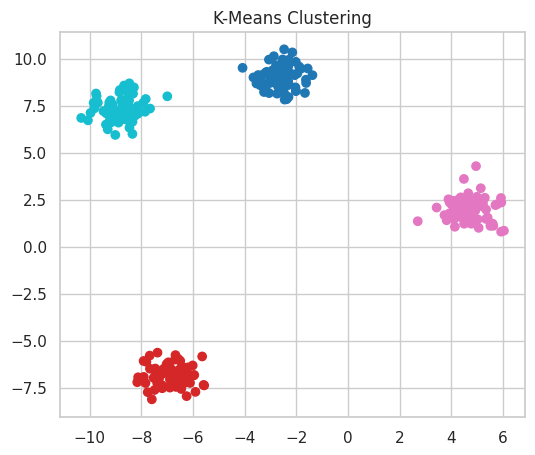

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=kmeans_labels,cmap='tab10')
plt.title('K-Means Clustering')
plt.show()